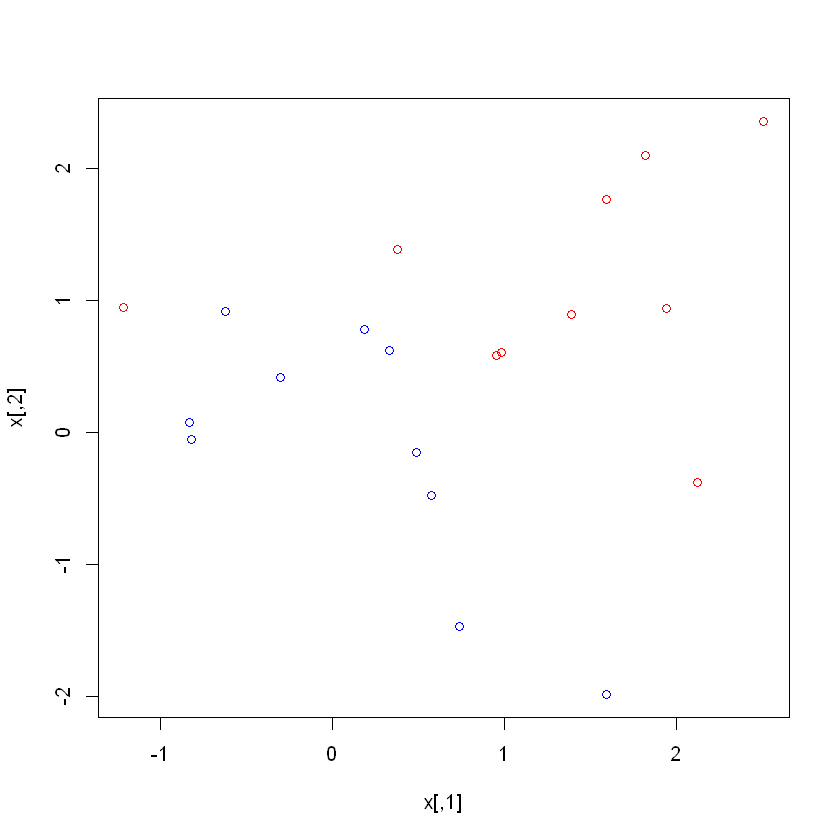

In [1]:
set.seed(1)
x = matrix(rnorm(20*2), ncol=2)
y=c(rep(-1, 10), rep(1, 10))
x[y == 1, ]=x[y == 1, ] + 1
plot(x, col=(3-y))

In [4]:
dat=data.frame(x=x, y=as.factor(y))
library(e1071)
svmfit = svm(y~., data=dat, kernel="linear", cost=10, scale=F)


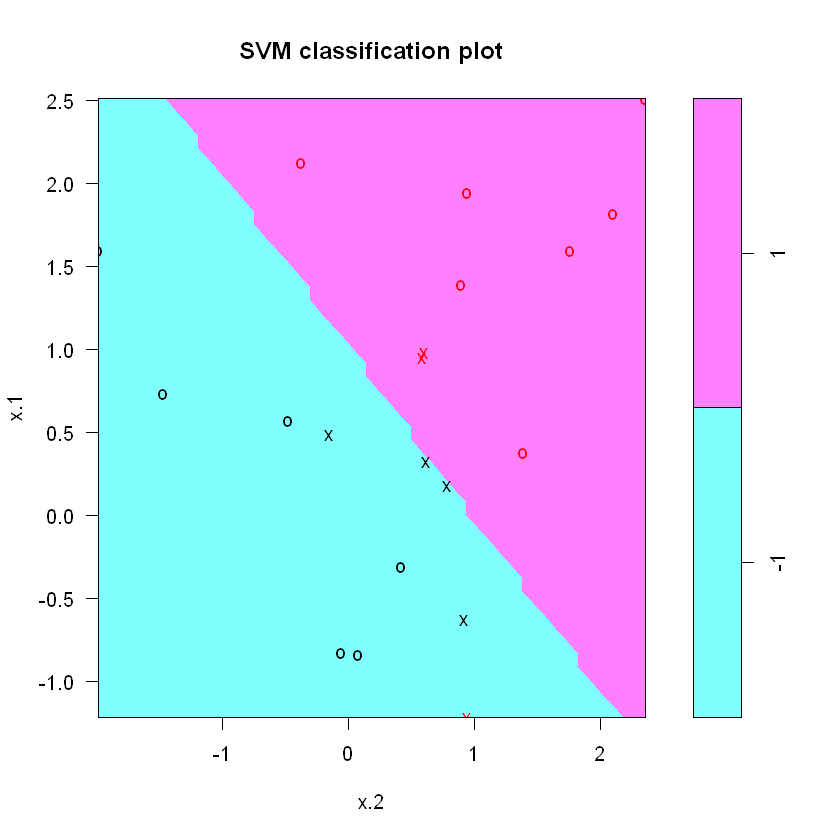

In [5]:
plot(svmfit, dat)


In [6]:
svmfit$index


[1]  1  2  5  7 14 16 17

In [7]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = F)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

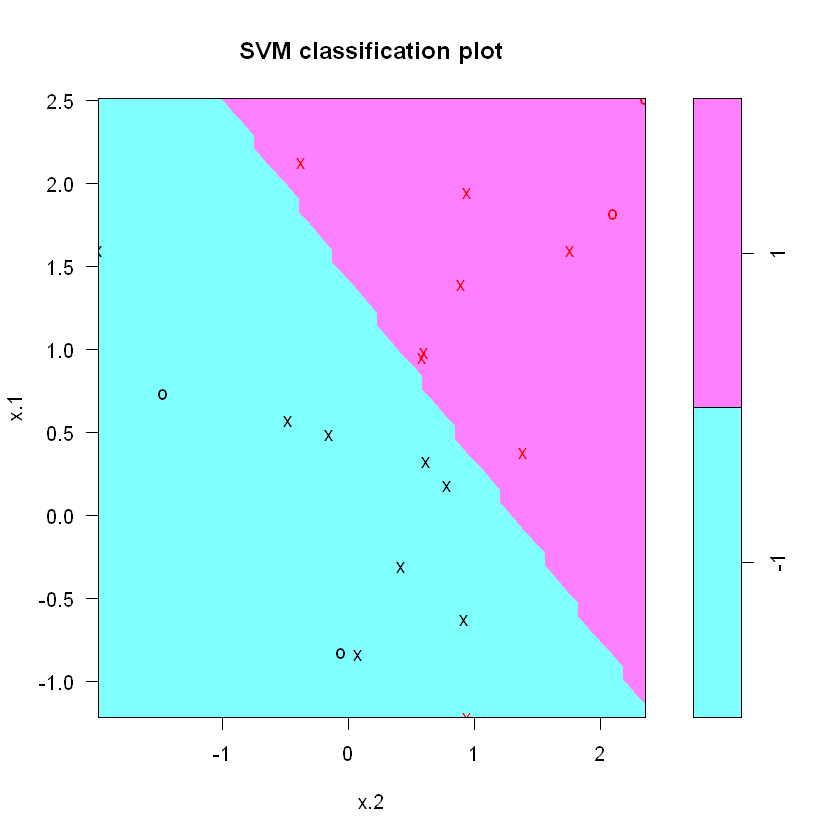

In [8]:
svmfit=svm(y~., data=dat, kernel="linear", cost=0.1,scale=FALSE)
plot(svmfit, dat)
svmfit$index

In [9]:
set.seed(1)
tune.out=tune(svm,y~.,data=dat,kernel="linear",ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100)))

In [10]:
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


In [11]:
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [12]:
xtest=matrix(rnorm(20*2), ncol=2)
ytest=sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1,] + 1
testdat=data.frame(x=xtest, y=as.factor(ytest))

In [13]:
ypred=predict(bestmod,testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  1
     1   0  8

In [14]:
svmfit=svm(y~., data=dat, kernel="linear", cost=.01,scale=FALSE)
ypred=predict(svmfit,testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  2
     1   0  7

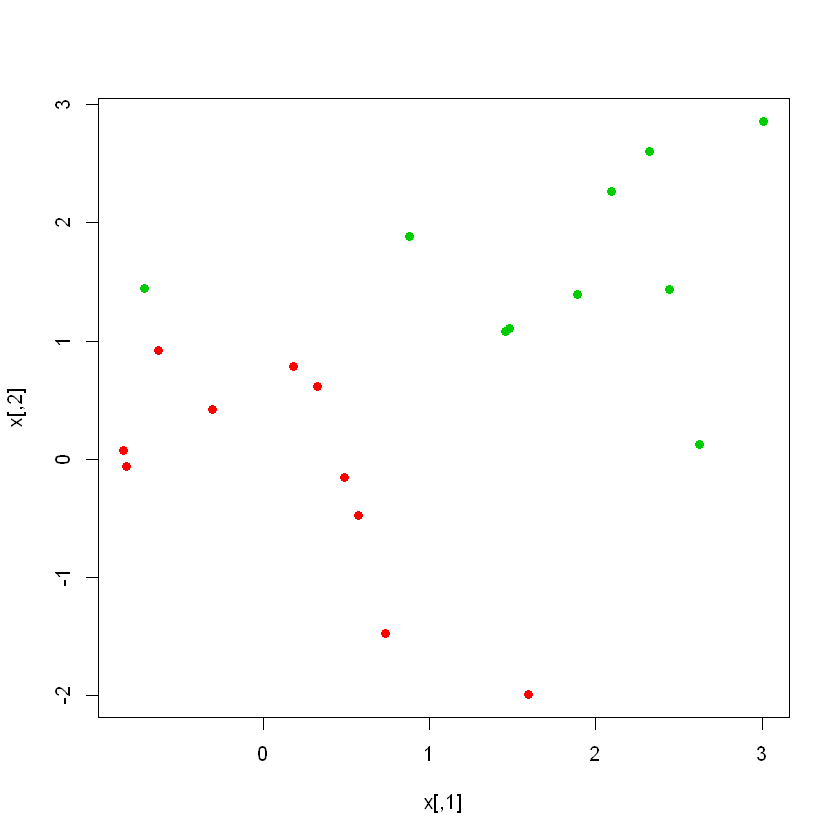

In [15]:
x[y==1,]=x[y==1,]+0.5
plot(x, col=(y+5)/2, pch=19)

In [16]:
dat=data.frame(x=x,y=as.factor(y))
svmfit=svm(y~., data=dat, kernel="linear", cost=1e5)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




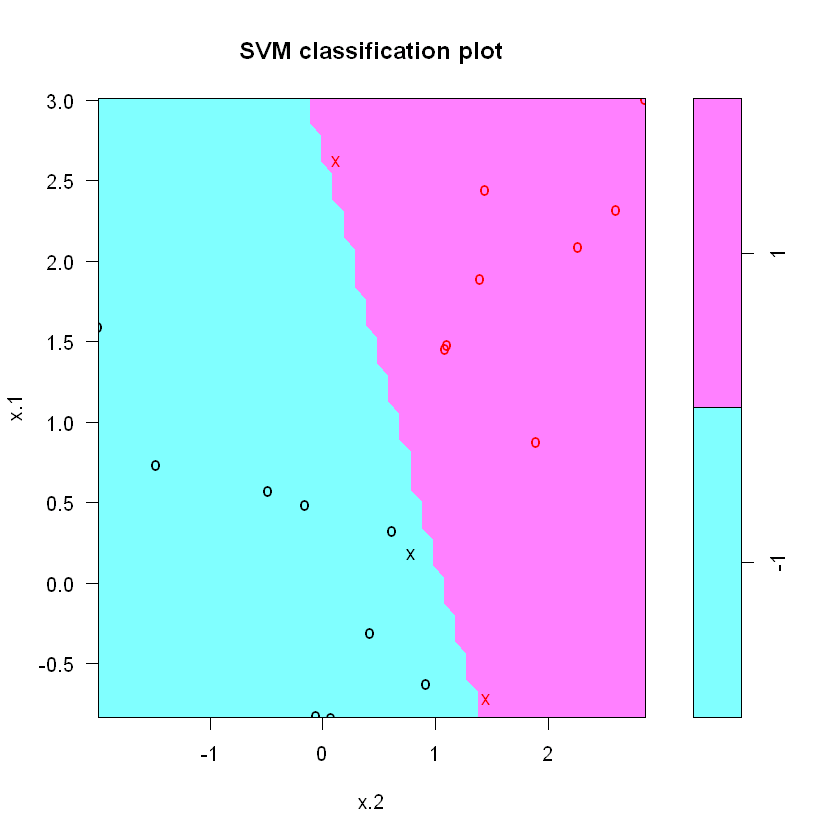

In [17]:
plot(svmfit, dat)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




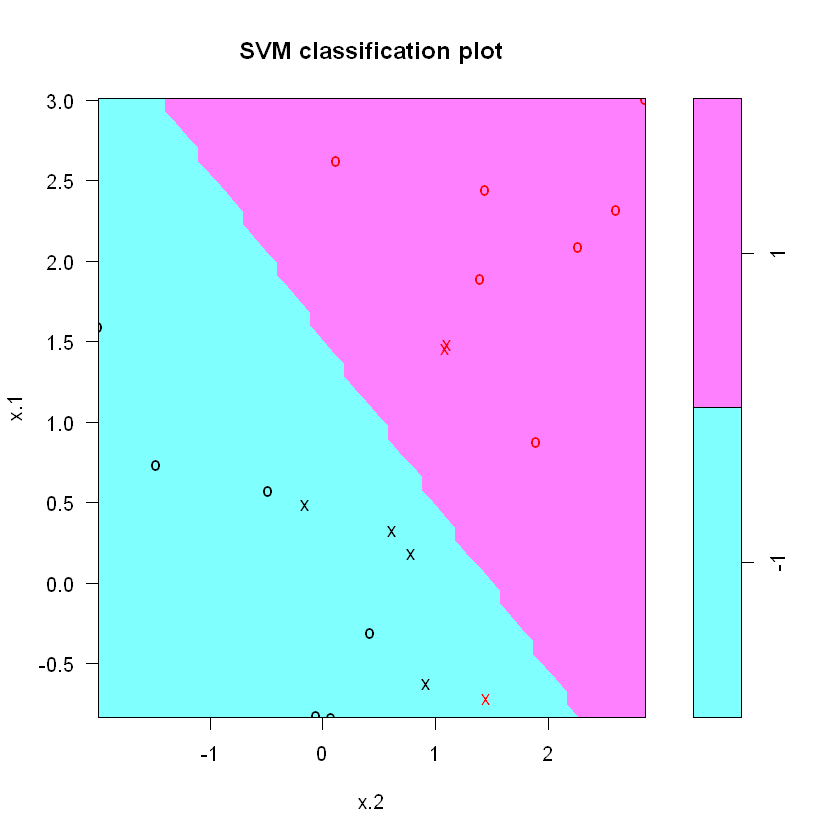

In [18]:
svmfit=svm(y~., data=dat, kernel="linear", cost=1)
summary(svmfit)
plot(svmfit,dat)

# svm


In [19]:
x=matrix(rnorm(200*2), ncol=2)
x[1:100,]=x[1:100,]+2
x[101:150,]=x[101:150,]-2
y=c(rep(1,150),rep(2,50))
dat=data.frame(x=x,y=as.factor(y))

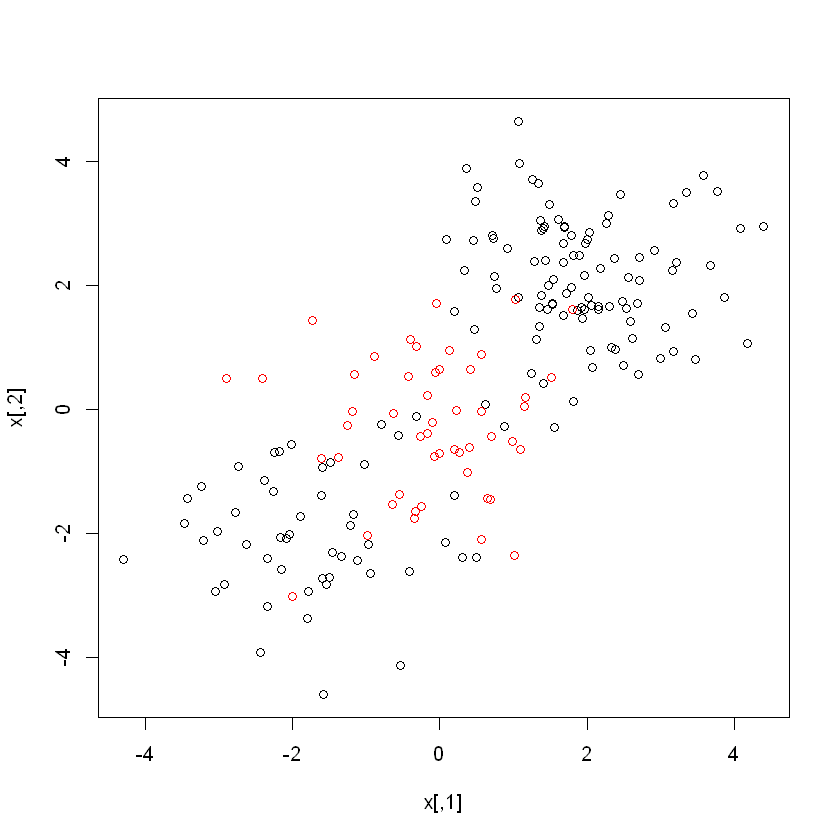

In [20]:
plot(x, col=y)

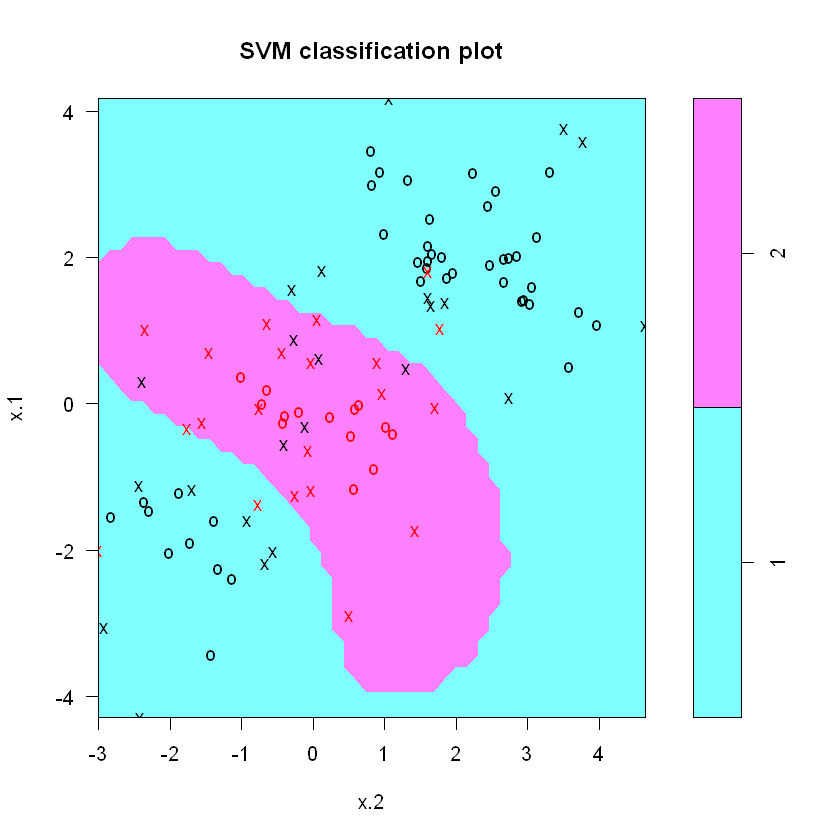

In [21]:
train=sample(200,100)
svmfit=svm(y~., data=dat[train,], kernel="radial",  gamma=1, cost=1)
plot(svmfit, dat[train,])

In [22]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  44

 ( 23 21 )


Number of Classes:  2 

Levels: 
 1 2




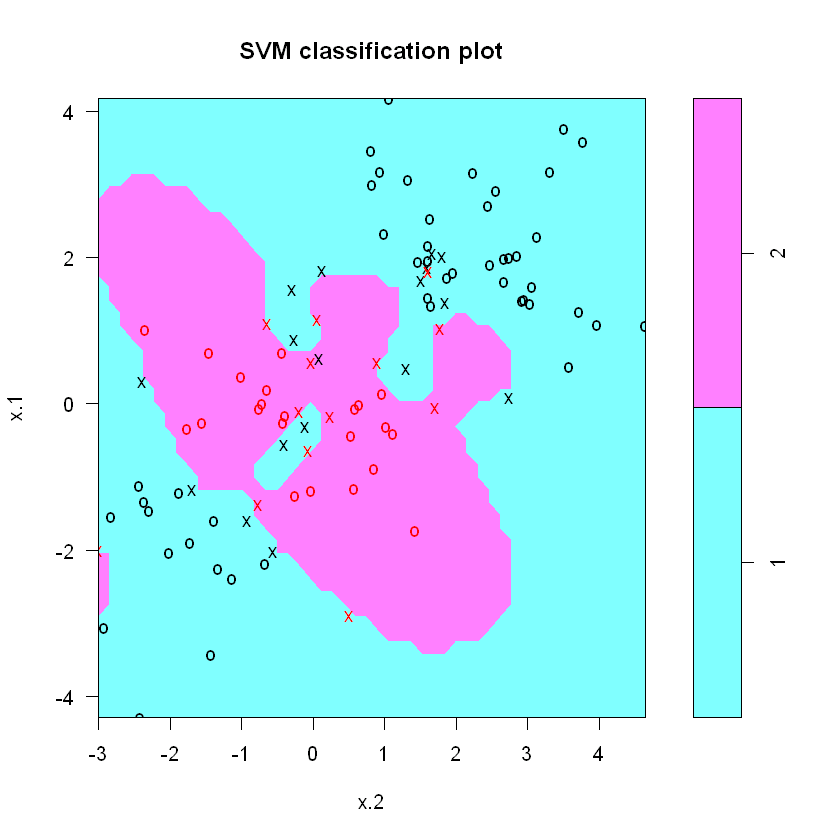

In [23]:
svmfit=svm(y~., data=dat[train,], kernel="radial",gamma=1,cost=1e5)
plot(svmfit,dat[train,])

In [24]:
set.seed(1)
tune.out=tune(svm, y~., data=dat[train,], kernel="radial", ranges=list(cost=c(0.1,1,10,100,1000),gamma=c(0.5,1,2,3,4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.12 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.27 0.20027759
2  1e+00   0.5  0.12 0.09189366
3  1e+01   0.5  0.15 0.12692955
4  1e+02   0.5  0.17 0.14944341
5  1e+03   0.5  0.18 0.16193277
6  1e-01   1.0  0.21 0.12866839
7  1e+00   1.0  0.13 0.08232726
8  1e+01   1.0  0.17 0.14944341
9  1e+02   1.0  0.17 0.14944341
10 1e+03   1.0  0.21 0.18529256
11 1e-01   2.0  0.29 0.19119507
12 1e+00   2.0  0.16 0.12649111
13 1e+01   2.0  0.19 0.16633300
14 1e+02   2.0  0.22 0.17511901
15 1e+03   2.0  0.23 0.17669811
16 1e-01   3.0  0.31 0.20248457
17 1e+00   3.0  0.18 0.16193277
18 1e+01   3.0  0.22 0.18135294
19 1e+02   3.0  0.24 0.17763883
20 1e+03   3.0  0.21 0.16633300
21 1e-01   4.0  0.36 0.18973666
22 1e+00   4.0  0.20 0.14907120
23 1e+01   4.0  0.24 0.17763883
24 1e+02   4.0  0.24 0.19550504
25 1e+03   4.0  0.23 0

In [25]:
table(true=dat[-train,"y"], pred=predict(tune.out$best.model,newx=dat[-train,]))


    pred
true  1  2
   1 53 32
   2  9  6

# Roc

In [26]:
library(ROCR)
rocplot=function(pred, truth, ...){
   predob = prediction(pred, truth)
   perf = performance(predob, "tpr", "fpr")
   plot(perf,...)}

Warning message:
: package 'ROCR' was built under R version 3.2.5Loading required package: gplots
Warning message:
: package 'gplots' was built under R version 3.2.5
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [27]:
svmfit.opt=svm(y~., data=dat[train,], kernel="radial",gamma=2, cost=1,decision.values=T)
fitted=attributes(predict(svmfit.opt,dat[train,],decision.values=TRUE))$decision.values


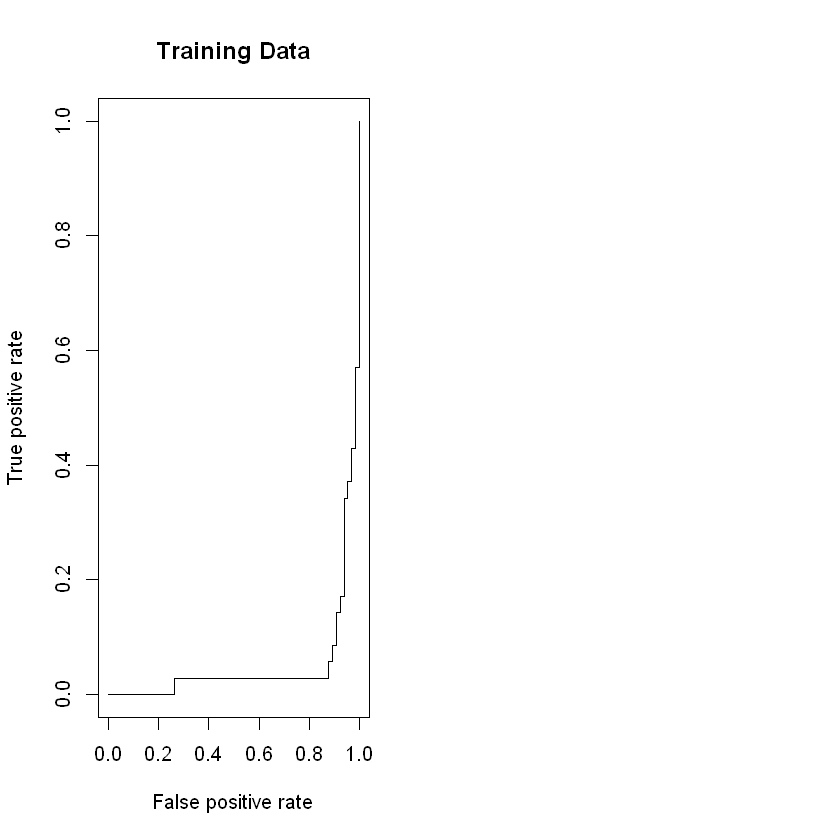

In [28]:
par(mfrow=c(1,2))
rocplot(fitted,dat[train,"y"],main="Training Data")


In [29]:
svmfit.flex=svm(y~., data=dat[train,], kernel="radial",gamma=50, cost=1, decision.values=T)
fitted=attributes(predict(svmfit.flex,dat[train,],decision.values=T))$decision.values
rocplot(fitted,dat[train,"y"],add=T,col="red")

ERROR: Error in plot.xy(col = "red", type = "l", xy = structure(list(x = c(0, : plot.new has not been called yet


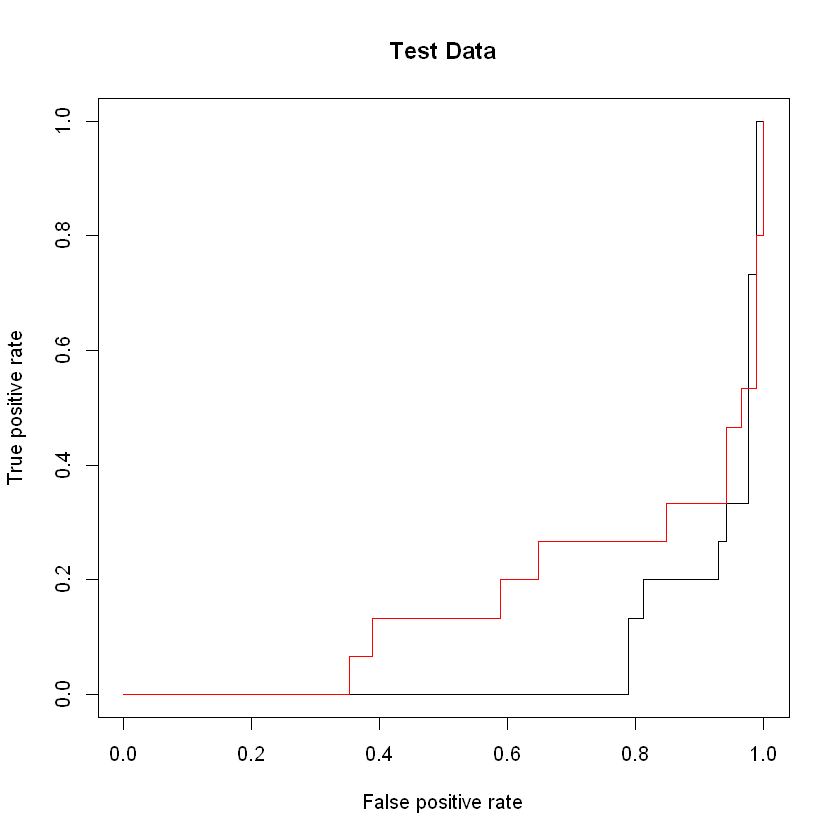

In [30]:
fitted=attributes(predict(svmfit.opt,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],main="Test Data")
fitted=attributes(predict(svmfit.flex,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],add=T,col="red")

# MULTIPLE CLASSES

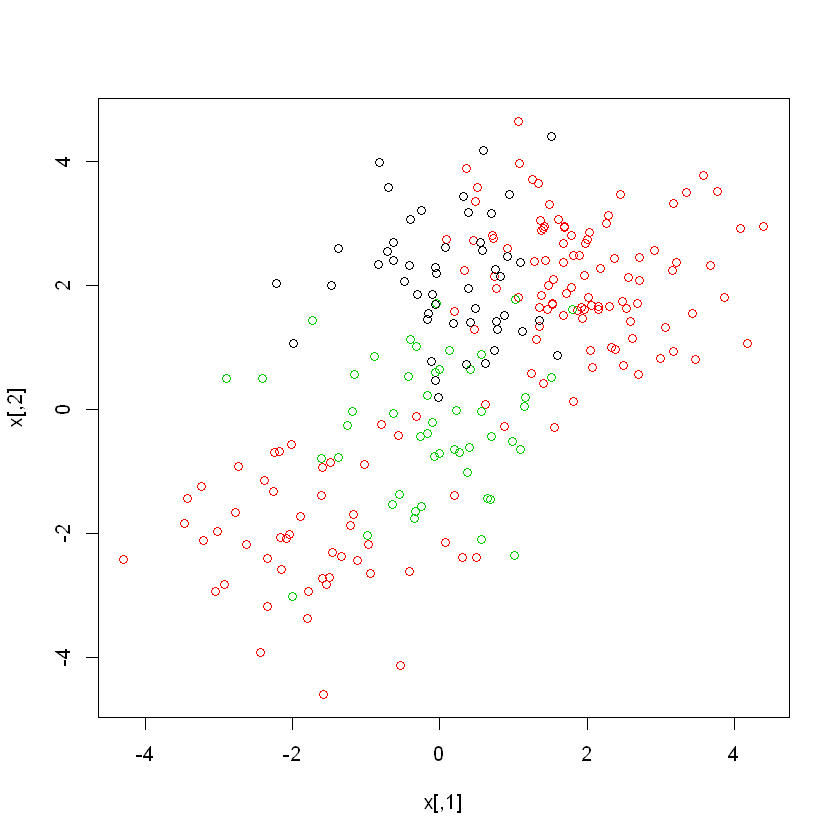

In [31]:
set.seed(1)
x=rbind(x, matrix(rnorm(50*2), ncol=2))
y=c(y, rep(0,50))
x[y==0,2]=x[y==0,2]+2
dat=data.frame(x=x, y=as.factor(y))
par(mfrow=c(1,1))
plot(x,col=(y+1))

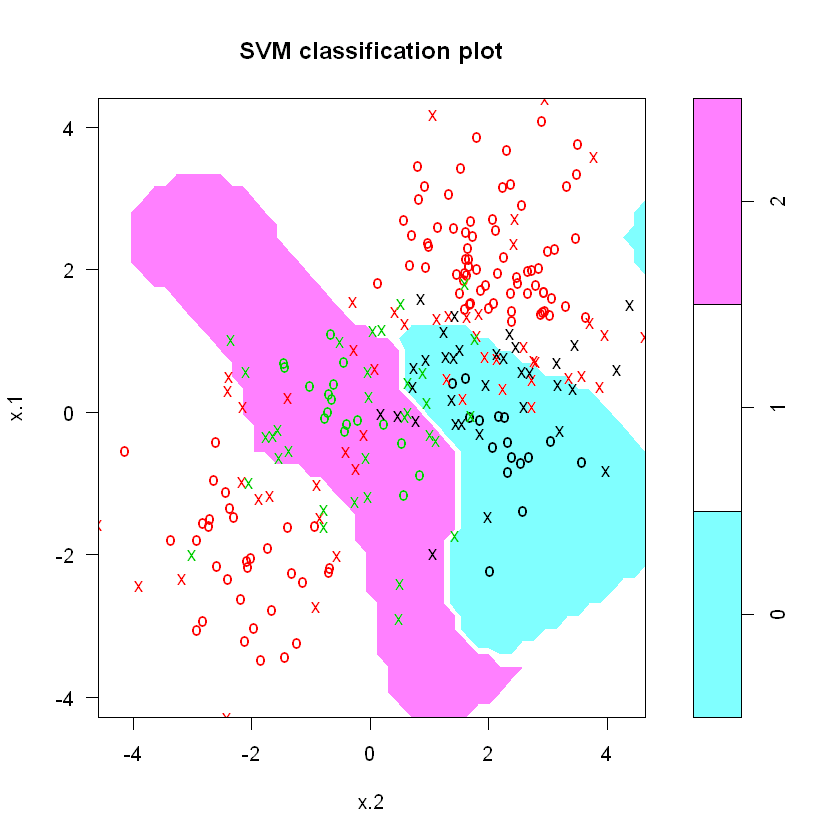

In [32]:
svmfit=svm(y~., data=dat, kernel="radial", cost=10, gamma=1)
plot(svmfit, dat)

In [33]:

library(ISLR)
names(Khan)
dim(Khan$xtrain)
dim(Khan$xtest)
length(Khan$ytrain)
length(Khan$ytest)
table(Khan$ytrain)
table(Khan$ytest)

[1] "xtrain" "xtest"  "ytrain" "ytest"

[1]   63 2308

[1]   20 2308

[1] 63

[1] 20


 1  2  3  4 
 8 23 12 20 


1 2 3 4 
3 6 6 5 

In [34]:
dat=data.frame(x=Khan$xtrain, y=as.factor(Khan$ytrain))
out=svm(y~., data=dat, kernel="linear",cost=10)
summary(out)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.0004332756 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




In [35]:
table(out$fitted, dat$y)

   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

In [36]:
dat.te=data.frame(x=Khan$xtest, y=as.factor(Khan$ytest))
pred.te=predict(out, newdata=dat.te)
table(pred.te, dat.te$y)

       
pred.te 1 2 3 4
      1 3 0 0 0
      2 0 6 2 0
      3 0 0 4 0
      4 0 0 0 5

19 May 2016--- Jiahong Wang